In [1]:
import typing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster

# import cuml

from src import load_data
from src import embeddings
from src import maps

pd.set_option("display.max_colwidth", None)


In [2]:

df_b, df_r = load_data.load_yelp_data()
emb_r = np.lib.format.open_memmap("data/r_emb_large.npy")

In [ ]:
umap = cuml.manifold.UMAP(n_components=5, n_neighbors=15, min_dist=0.0, random_state=12)
reduced_data = umap.fit_transform(emb_r)

[2025-07-24 10:30:31.843] [CUML] [info] build_algo set to brute_force_knn because random_state is given


In [6]:
clusterer = cuml.cluster.hdbscan.HDBSCAN(min_cluster_size=50, metric="euclidean", prediction_data=True)
clusterer.fit(reduced_data)
soft_clusters = cuml.cluster.hdbscan.all_points_membership_vectors(clusterer)

: 

: 

: 

In [25]:
as_r = np.load("data/kmeans_assignments_2.npy")[1].astype(int)

In [ ]:
# df_r[as_r == 11][["stars", "text"]].head()
df_r["cluster"] = as_r

In [30]:
df_r[as_r == 4][["stars", "text"]].head()


,stars,text
7,5,"My boyfriend and I tried this deli for the first time today. I had a turkey, avocado & bacon panini and he ha a buffalo chicken wrap. We will definitely be returning. The wait for food wasn't too long, which is always appreciated during lunch hour. There was SO much to choose from. They have salads, soup, macaroni, sandwiches and hot food. I love a deli that has many options to choose from!"
23,4,"Good food, reasonably priced, and nice staff. Not ideal for eating in, but since they are going for a fast food approach to vegan food, that makes a lot of sense. I know the buffalo bella is the dish that they push the hardest, but for my money the Cheesesteak is the way to go. And pro-tip: Get the sweet potato fries."
31,4,"As airport grab-and-go restaurants are, Earl does a decent job with a variety of sandwich options including turkey, tuna and even a Hawaiian. But today I could smell the roast beef and so I got that one. Yum. Good portion of sliced beef that was beyond medium cooked with cheddar cheese and a yummy horseradish sauce. Nope, don't get lettuce or tomatoes on it. It's perfect the way it is.\n\nAnd since it's right between the security station and the top of the D gates (right near the Delta SkyClub!), it's easy to get and eat at the gate or on board."
37,4,Love the sweet spiral plain pies at Franzones. Can't go wrong with plain. I tried the white pizza with onions in addition and it was a pleasant surprise. The onions were a great addition to the pizza. Same Franzone's as the Bridgeport one I grew up with.
46,5,"I really like Franzone's. The owner is typically around, super friendly, and seems to really care about the product. While I'm not a big fan of sweet sauce, they also do a decent cheesesteak, fries, etc. Honestly, they may have been closer to a 4 if not that it's always just a really pleasant experience going in, which boosts their rating for me."


In [179]:
tgt_words = ['trendy', 'new', 'craft', 'artisanal', 'crowded', 'wait', 'line', 'expensive', 'loud']
tgt_words_inv = ['local', 'accessible', 'affordable', 'cozy', 'neighborhood', 'quiet']
tgt = np.sum([embeddings.embedding(word) for word in tgt_words], axis=0)
tgt -= np.sum([embeddings.embedding(word) for word in tgt_words_inv], axis=0)
# tgt = embeddings.embedding("good")
df_r["d5"] = emb_r @ tgt


In [ ]:
tgt_words_02 = df_r.sort_values("d5", ascending=False).head(20)["text"].to_list()
tgt_02 = np.mean([embeddings.embedding(word) for word in tgt_words_02], axis=0)
df_r["d6"] = emb_r @ tgt_02

In [236]:
df_r.sort_values("d6", ascending=False).head(5)[["stars", "text", "d6"]]

,stars,text,d6
37472,3,"new concept rolled ice cream ok let's try, we walk in and order 2 cups tango mango and Oreo ... pay 14 bucks then told it will be a 45 minute wait (are you kidding me) they can only make 2 at a time and apparently there was 15 people in front of me ... Maybe you wanted to tell me this before I paid! 45 minutes lasted an hour finally they call my number!!! It was good not great and certainly not worth the wait!!!",0.358318
3879,3,"Love the concept...and apparently so does half the city. Long lines, competing music, and general chaos rule here. Bring cash and a crap load of patience and maybe you can find the few diamonds in the rough.",0.351313
505375,3,"We see them rollin,\nWe waitin,\nThey're spreading, trying to freeze it till its ready,\nTrying to get ice cream already.\nTrying to get ice cream already.\nTrying to get ice cream already.\nTrying to get ice cream already.\n\nI've been wanting to try this new phenomenon for a while, and what better day than national ice cream day? Well apparently 40 other people (including a screaming baby and his dad who was slowly getting a sunburn as we waited) thought so too. From about 30 feet from the entrance the wait was AN HOUR LONG. The ice cream is good but it's not waiting in line at Disney world for an upside down roller coaster good. It's not 2/3 of a Pixar movie good. \n\nYou'll have time to decide in line but for those who have choice anxiety: you pick a base (ice cream, froyo, vegan ice cream), then you can build your own or do one of their premade things (strawberry cheesecake, smore, nutella banana, cinnamon toast crunch, etc.) (This gets mixed in) they spread it out, it looks cool (literally), it's almost performance art, tbh, they roll it all fancy and if you're lucky they'll write your name in cursive chocolate, and then you can add unlimited toppings! (Ok but think about how many toppings you could add for $7 at your regular ice cream/froyo place, that's right, this ice cream is the price of a burrito, might have to be a chamillionaire if you're coming here a lot).\n\nTl;dr: Delicious, choose your own adventure with vegan option, fresh tasting, cool experience, but kinda overpriced, and I'm never waiting in this line again. Go at off peak hours or just don't go.",0.349453
92830,2,"The food is good... Is that the reason for the long line? No. Be prepared to wait as the chef serves food at a snails pace, accumulating up to 20+ young professionals all standing in single file. Besides having to wait in line onwards to up to 40 minutes, you have to wait another 10 minutes as he selfishly rants about how fresh and ""quality"" the food is. It would be one thing if you could eject yourself from his one sided conversation, however he strategically holds your food at ransom until he gets tired of reciting the same repetitive catch phrase, ""quality"". \n\nBeware of this octopus and the appearance of quality. The long lines induced by shear slowness and the rumbling rants of ""quality"" are a ploy to make you think you are getting more than what you are actually getting, mediocre cart food.",0.348540
525629,3,"Nothing wrong with handmade, made-to-order, custom ice cream, mixed while you wait, with unlimited mix-ins. Not so great, however, is waiting in a looong line. For ice cream. In February. (Or, ever.)\n\nWe went on a chilly Friday night, and there was about a 30 minute wait. The long line can mostly be attributed to workflow logistics and limited ""cooking""/prepping space inside, not necessarily because of the crowd. I'd say there were about 20 people ahead of us in line, many of whom were families and groups that were paying together, which I initially thought would speed things along. (Spoiler: It didn't.)\n\nThere's one size, a few flavor options, and about 10 toppings, including fruit, whipped cream, and pieces of donut. All are $7, with unlimited free toppings. (Don't get carried away, not many fit into the cup!) \n\nOnce you choose a flavor, the 

In [249]:
df_r["d6"].quantile(0.975)

0.2694767631590366

Looking at Shake Shack
PRE reviews: 5905, POST reviews: 6790
KstestResult(statistic=0.04905954490528109, pvalue=4.75752276866034e-07, statistic_location=0.2109941, statistic_sign=-1)


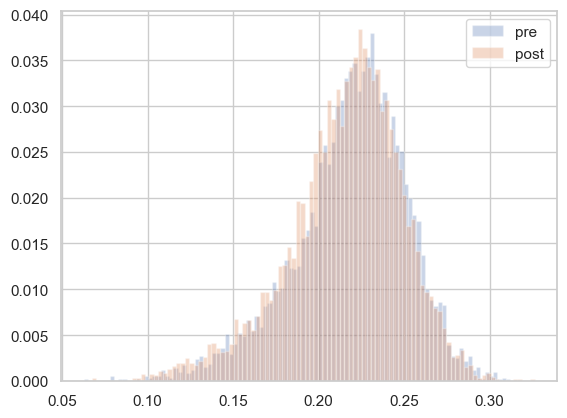

Looking at La Colombe Coffee
PRE reviews: 9214, POST reviews: 9984
KstestResult(statistic=0.012648498939740528, pvalue=0.4226404620345117, statistic_location=0.23857863, statistic_sign=-1)


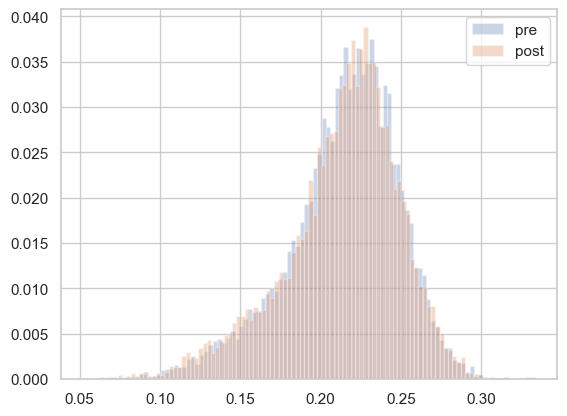

Looking at Zahav
PRE reviews: 694, POST reviews: 1032
KstestResult(statistic=0.04719578669883609, pvalue=0.3014471510118962, statistic_location=0.2490211, statistic_sign=1)


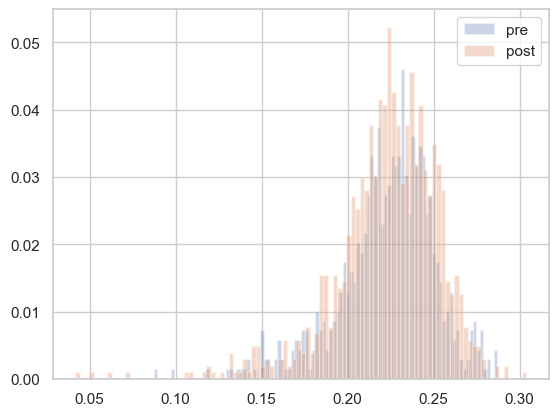

Looking at Federal Donuts
PRE reviews: 7457, POST reviews: 7643
KstestResult(statistic=0.041549341875494604, pvalue=4.1986209682207924e-06, statistic_location=0.23586535, statistic_sign=-1)


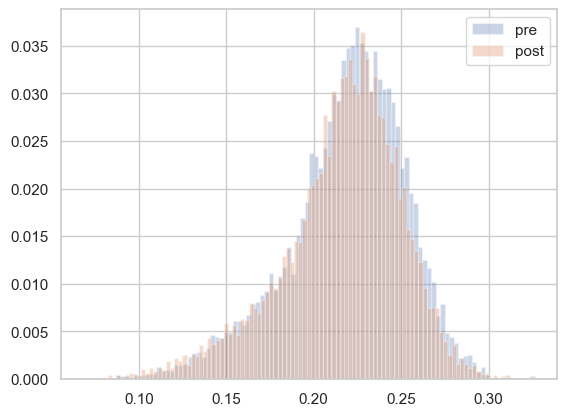

Looking at Whole Foods Market
PRE reviews: 1804, POST reviews: 1812
KstestResult(statistic=0.03527236506561333, pvalue=0.20363338536960268, statistic_location=0.22013769, statistic_sign=1)


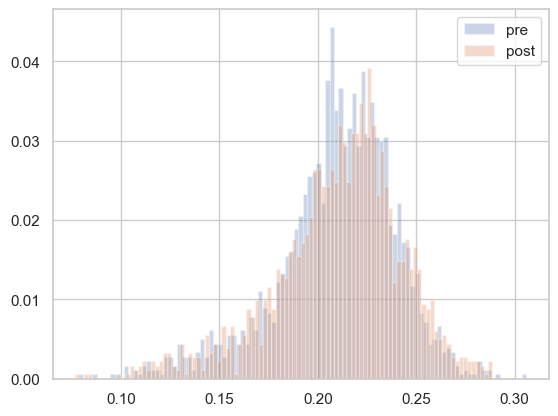

Looking at Warby Parker
PRE reviews: 10482, POST reviews: 11534
KstestResult(statistic=0.01161502984613949, pvalue=0.4458930122691842, statistic_location=0.17989197, statistic_sign=-1)


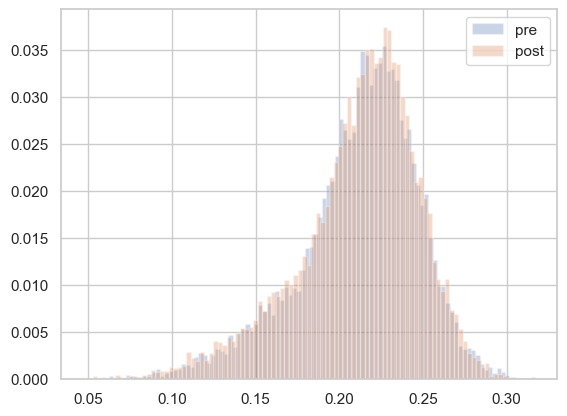

In [ ]:
# df_e = pd.read_csv("data/events.csv", index_col="name")
from scipy import stats
# import statsmodels.api as sm
# from statsmodels.gam.api import GLMGam, BSplines

df_b_by_id = df_b.set_index("business_id")
ids = [
    ("BxfvdHqETU8jWYUjx5OL2A", "10-30-2012"), # shake shack
    ("htO_nlxkEsYHzDrtbiUxew", "10-24-2014"), # la colombe

    # relatively few reviews for trader joes so not using
    # ("mzTTdvQGkUHZ8ii7OnZC5w", "10-16-2006"), # trader joes

    ("ctHjyadbDQAtUFfkcAFEHw", "10-03-2008"), # zahav
    ("iRLFBbtyP8dpOKSFi6wXfg", "10-21-2011"), # federal donuts
    ("lpDOqBhkJlxACzKQGAj_uA", "10-14-2016"), # whole foods
    ("4FS0BXHYW2ag97OgJ_awLw", "10-17-2014"), # warby parker
]
def search(business_id: str, date: str) -> object:
    sel_pos = maps.dist(
        df_r["latitude"],
        df_r["longitude"],
        df_b_by_id["latitude"][business_id], 
        df_b_by_id["longitude"][business_id],
    ) < 0.25
    date = pd.to_datetime(date)
    date_pre = date - pd.to_timedelta(365, "D")
    date_post = date + pd.to_timedelta(365, "D")
    r1 = df_r[sel_pos & (date_pre < df_r["date"]) & (df_r["date"] < date) & (df_r["business_id"] != business_id)]
    r2 = df_r[sel_pos & (date < df_r["date"]) & (df_r["date"] < date_post) & (df_r["business_id"] != business_id)]
    print(f"Looking at {df_b_by_id['name'][business_id]}")
    print(f"PRE reviews: {len(r1)}, POST reviews: {len(r2)}")
    print(stats.ks_2samp(r1["d6"], r2["d6"]))
    # print(stats.mannwhitneyu(r1["d6"], r2["d6"], alternative="two-sided"))


    r1["d6"].hist(label="pre", bins=100, alpha=0.3, weights=np.ones(len(r1)) / len(r1))
    r2["d6"].hist(label="post", bins=100, alpha=0.3, weights=np.ones(len(r2)) / len(r2))
    plt.legend()
    plt.show()
    # df_r["date"]
    # r0 = df_r[sel_pos & (date_pre < df_r["date"]) & (df_r["date"] < date_post) & (df_r["business_id"] != business_id)]
    # r0 = r0.copy()
    # r0["dt"] = pd.to_timedelta(df_r["date"] - date)
    # r0["dt"] = r0['dt'].dt.days

    # r0 = r0.sort_values("dt")
    
        
    # # --- Convert to NumPy Arrays BEFORE interacting with statsmodels ---
    # # This is the key change to avoid potential Pandas-related issues.
    # y_data = r0['d6'].values
    # x_data = r0['d6'].values

    # # The smoother needs a 2D array, so we reshape it.
    # x_data_reshaped = x_data.reshape(-1, 1)



    # # --- Fit a Generalized Additive Model (GAM) with statsmodels ---
    # # Define the spline basis using the pure NumPy array
    # bs = BSplines(x_data_reshaped, df=3, degree=2)

    # # Use the GLMGam class directly with NumPy arrays, not the .from_formula method
    # # We model 'y_data' as a function of our B-spline basis.
    # # FIX: The linear predictors should be passed to the 'exog' parameter, not 'alpha'.
    # gam_model = GLMGam(y_data, exog=sm.add_constant(x_data), smoother=bs).fit()



    # # --- Visualize the Results ---
    # plt.figure(figsize=(14, 8))
    # sns.set_theme(style="whitegrid")

    # # Plot the raw data points
    # plt.scatter(x_data, y_data, alpha=0.1, label='Raw Review Data', color='gray')

    # # Get the model's predictions to plot the trend line
    # predictions = gam_model.get_prediction(exog=sm.add_constant(x_data), exog_smooth=x_data_reshaped)
    # prediction_summary = predictions.summary_frame()

    # # Plot the fitted smooth curve from the GAM
    # plt.plot(x_data, prediction_summary['mean'],
    #         color='royalblue', linewidth=3, label='Fitted GAM Trend')

    # # Plot the 95% confidence interval for the trend
    # plt.fill_between(x_data, prediction_summary['mean_ci_lower'],
    #                 prediction_summary['mean_ci_upper'], color='cornflowerblue',
    #                 alpha=0.3, label='95% Confidence Interval')

    # # Add a vertical line for the opening day
    # plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Opening Day')

    # # --- FIX: Zoom in on the y-axis to make the trend more visible ---
    # # Calculate the min and max of the confidence interval to find the trend's range
    # y_min = prediction_summary['mean_ci_lower'].min()
    # y_max = prediction_summary['mean_ci_upper'].max()
    # y_range = y_max - y_min

    # # Set the y-axis limits to be slightly larger than the trend's range
    # plt.ylim(y_min - y_range * 0.2, y_max + y_range * 0.2)
    # # --- End of Fix ---

    # plt.title('Hype Score Over Time Modeled with a GAM (using statsmodels and NumPy)', fontsize=16)
    # plt.xlabel('Days From Opening Date')
    # plt.ylabel('Hype Score (Zoomed In)')
    # plt.legend()
    # plt.show()

    # # You can also get a summary of the model's performance
    # print(gam_model.summary())

    # corr_coefficient, p_value = stats.pearsonr(r0['dt'].dt.days / 365, r0['d5'])
    # print(f"Pearson Correlation: coefficient={corr_coefficient:.3f}, p-value={p_value:.3f}")

    # sns.kdeplot(
    #     data=r0,
    #     x='dt',
    #     y='d6',
    #     fill=True,      # Fill the contours to create the heatmap effect
    #     thresh=0,       # Include all areas, even with low density
    #     levels=100,     # Increase levels for smoother color transitions
    #     cmap="viridis"     # A nice color map, "viridis" or "rocket" also work well
    # )
    # plt.axvline(0, color="red")
    # plt.show()
# r1 = df_r[sel_pos & (pd.to_datetime("10-30-2011") < df_r["date"]) & (df_r["date"] < pd.to_datetime("10-30-2012"))]
# r2 = df_r[sel_pos & (pd.to_datetime("10-30-2012") < df_r["date"]) & (df_r["date"] < pd.to_datetime("10-30-2013"))]
# len(r1), len(r2)
search(*ids[0])
search(*ids[1])
search(*ids[2])
search(*ids[3])
search(*ids[4])
search(*ids[5])
# search(*ids[6])


In [88]:
r1["d2"].mean(), r2["d2"].mean()

(0.099099346, 0.09813629)

KstestResult(statistic=0.024971793086401656, pvalue=0.03636630437031786, statistic_location=0.10839966, statistic_sign=-1)

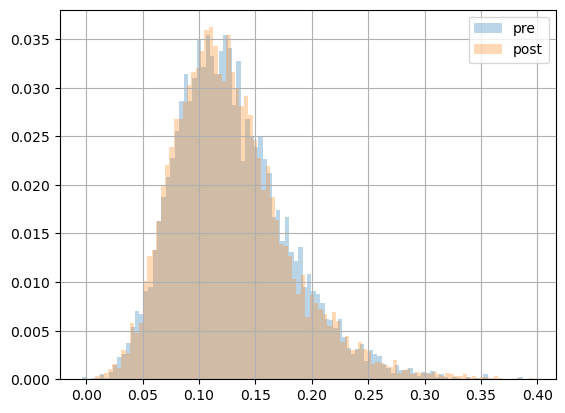

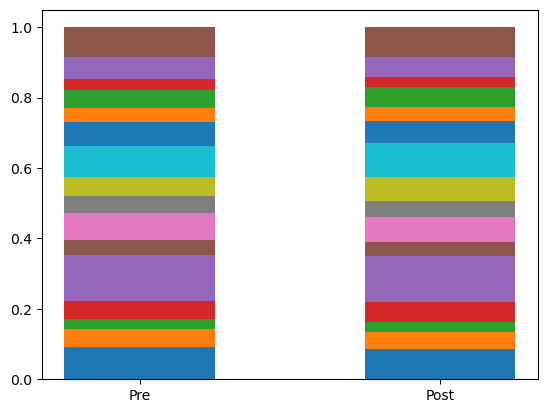

In [ ]:
# print(r1["cluster"].mean(), r2["cluster"].mean(), r3["cluster"].mean())
# r1["d1"].hist(label="pre", bins=100, alpha=0.3)
# r2["d1"].hist(label="mid", bins=100, alpha=0.3)
# r3["d1"].hist(label="post", bins=100, alpha=0.3)
# data = np.array([r1["cluster"], r2["cluster"], r3["cluster"]])
fig, ax = plt.subplots()
bottom = np.zeros(2)
for cat in range(16):
    nx = np.array([np.mean(r["cluster"] == cat) for r in [r1, r2]])
    ax.bar(["Pre", "Post"], nx, 0.5, label=f"Cluster #{cat}", bottom=bottom)
    bottom += nx

# ax.legend(loc="upper right")
plt.show()

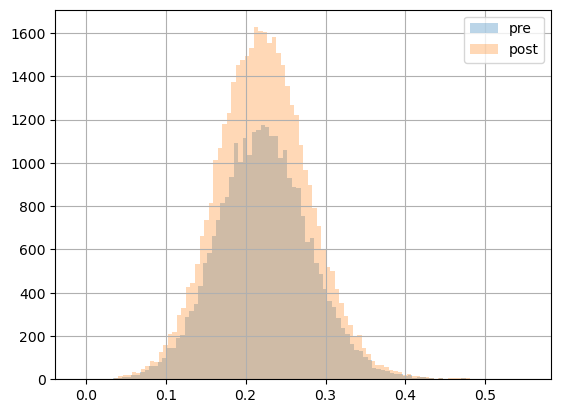

In [ ]:
r1, r2 = maps.select_reviews("40th Street Station (Market–Frankford Line)", df_r)
# print(r1["d1"].mean(), r2["d1"].mean())
r1["d1"].hist(label="pre", bins=100, alpha=0.3)
r2["d1"].hist(label="post", bins=100, alpha=0.3)
plt.legend()
plt.show()

In [3]:
import tkinter
import tkintermapview

CITY_CENTER = 39.9526, -75.1652

root_tk = tkinter.Tk()
root_tk.geometry(f"{800}x{600}")
root_tk.title("BU Project")

# create map widget
map_widget = tkintermapview.TkinterMapView(root_tk, width=800, height=600, corner_radius=0)
map_widget.place(relx=0.5, rely=0.5, anchor=tkinter.CENTER)
map_widget.set_position(*CITY_CENTER)
map_widget.set_zoom(10)

for row in df_b.itertuples(index=False):
    marker = map_widget.set_marker(row.latitude, row.longitude, row.name)

root_tk.mainloop()

KeyboardInterrupt: 

In [ ]:
# e1 = embeddings.embedding("brick")
# df_r["d1"] = emb_r @ e1
# df_r.sort_values("d1", ascending=False).head(20)[["stars", "text", "d1"]]

,stars,text,d1
823453,5,Brickwall is Phillys newest casual bar. Great ...,0.372336
880968,5,"Fast, efficient, and overall great quality. Fu...",0.370213
875410,4,Brick brunch - worth it! They serve you muffin...,0.366058
901638,2,Brick could be a lot better. I went there for ...,0.351817
11441,5,The brick build atop Pennsylvania field stones...,0.347256
259426,1,Replaced exterior stack pipe. In the process t...,0.338935
110269,3,"Brick oven pizza , quick, slices , old city",0.332484
123284,2,I decided to try the brick house grilled chees...,0.331618
956854,5,When Mike evaluated our home and bricks he pro...,0.330046
920415,5,I had dinner at Brick last night for a girls n...,0.329503


In [17]:
d = maps.dist(
    np.array(df_r["latitude"]), 
    np.array(df_r["longitude"]), 
    39.956944, 
    -75.201944,
)
df_r_close_early = df_r[(d < 1.0) & (df_r["date"] < pd.to_datetime("10/03/2015"))]